## This problem is all about linear regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(10.0, 5.0)

# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)

(237, 4)


In [2]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
# collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [4]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i]- mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1,b0)


0.26342933948939945 325.57342104944223


### Plotting the graph

<function matplotlib.pyplot.show(close=None, block=None)>

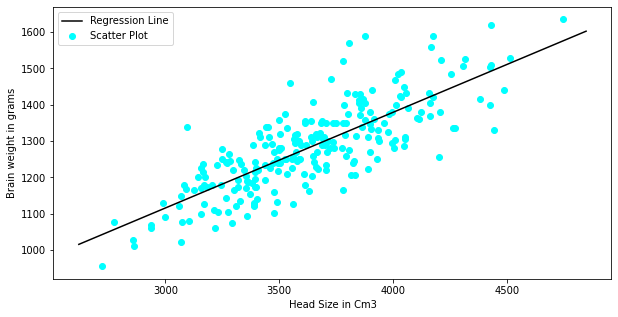

In [5]:
# Plotting Values and regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating Line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Plotting line
plt.plot(x, y, color = 'black', label ='Regression Line')

# plotting scatter Points
plt.scatter(X,Y, color='cyan', label ='Scatter Plot')

plt.xlabel('Head Size in Cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show

## Finding R Squared Value using R Squared Method
* **We have to check our model is good or not so we can verify that using
    R Squared Method.**

In [6]:
ss_t = 0 #total sum of square
ss_r = 0 #otal sum of square of receduels
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y)** 2
    ss_r += (Y[i] - y_pred)** 2
    
r2 = 1-(ss_r/ss_t)
print(r2)

0.6393117199570003


## Implimenting the same algorithm using Scikit Learn

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m,1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X,Y)
# Y prediction
Y_pred = reg.predict(X)

# Calculating R2 Score
r2_score = reg.score(X,Y)

print(f'Our R2 Score is {r2_score}')

Our R2 Score is 0.639311719957
